**Домашнее задание**  

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)  
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety  
Разделите данные на выборку для обучения и тестирования  
Постройте модель LDA  
Визуализируйте предсказания для тестовой выборки и центры классов  
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width  
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# загружаем и выбираем данные
iris = load_iris()
data_all = pd.DataFrame(iris["data"], columns=iris["feature_names"])
data_selected = data_all[["sepal length (cm)", "sepal width (cm)"]]
data = data_selected.copy()
data["variety"] = iris["target"]
data

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [3]:
# делим выборку для теста и обучения и удаляем результат
data_train, data_test = train_test_split(data, test_size=0.2)
y_train, y_test = data_train["variety"], data_test["variety"]
y_test = y_test.reset_index()["variety"]
del data_train["variety"]
del data_test["variety"]

# обучаем модель
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)
predict = pd.Series(lda.predict(data_test), name="predict")

# проверяем работу на тестовых данных сравнивая предсказание и правильные ответы
accur = accuracy_score(y_test, predict)

print(f"Построенная модель в {round(accur * 100, 2)}% случаев работает верно.")
print("Это довольно неплохой результат для 2 признаков из 4.")

Построенная модель в 86.67% случаев работает верно.
Это довольно неплохой результат для 2 признаков из 4.


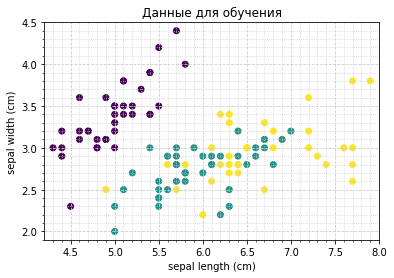

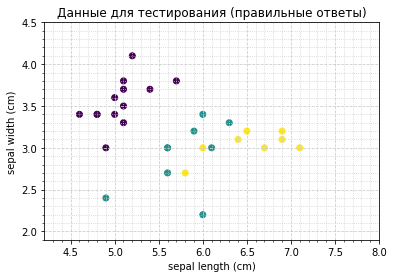

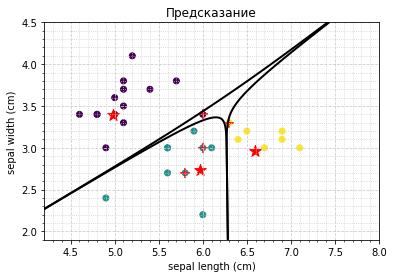

Значком '*' помечены центроиды, значком '+' помечены точки, в которых модель предсказала неверно.


In [4]:
def set_grid(plt):
    fig, ax = plt.subplots()

    # Set axis ranges; by default this will put major ticks every 25.
    ax.set_xlim(4.2, 8)
    ax.set_ylim(1.9, 4.5)

    # Change major ticks to show every 20.
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))

    # Change minor ticks to show every 5. (20/4 = 5)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))

    # Turn grid on for both major and minor ticks and style minor slightly differently.
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

set_grid(plt)
plt.scatter(data_train["sepal length (cm)"], data_train["sepal width (cm)"], c=y_train)
#plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c="r", s=150, marker='*')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Данные для обучения")
plt.show()

set_grid(plt)
plt.scatter(data_test["sepal length (cm)"], data_test["sepal width (cm)"], c=y_test)
#plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c="brown", s=150, marker='*')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Данные для тестирования (правильные ответы)")
plt.show()

set_grid(plt)
plt.scatter(data_test["sepal length (cm)"], data_test["sepal width (cm)"], c=predict)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c="r", s=150, marker='*')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Предсказание")

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z0 = Z[:, 0].reshape(xx.shape)
Z1 = Z[:, 1].reshape(xx.shape)
Z2 = Z[:, 2].reshape(xx.shape)
plt.contour(xx, yy, Z0, [0.5], linewidths=2., colors="black")
plt.contour(xx, yy, Z1, [0.5], linewidths=2., colors="black")
plt.contour(xx, yy, Z2, [0.5], linewidths=2., colors="black")

results = pd.DataFrame([y_test, predict]).T
results = results[results["variety"] != results["predict"]]
failed = data_test.iloc[results.index]
plt.scatter(failed["sepal length (cm)"], failed["sepal width (cm)"], c="red", s=100, marker='+')
plt.show()

print("Значком '*' помечены центроиды, значком '+' помечены точки, в которых модель предсказала неверно.")

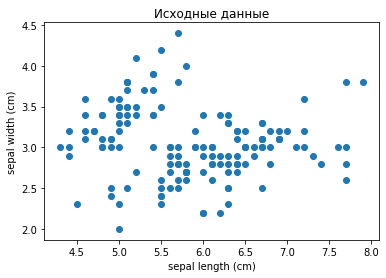

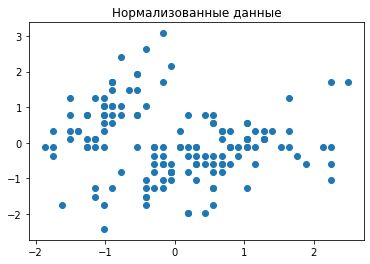

In [5]:
# делаем нормализацию данных (чтобы данные были одинаковых порядков)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

plt.scatter(data_selected["sepal length (cm)"], data_selected["sepal width (cm)"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Исходные данные")
plt.show()

plt.scatter(data_scaled[:, 0], data_scaled[:, 1])
plt.title("Нормализованные данные")
plt.show()

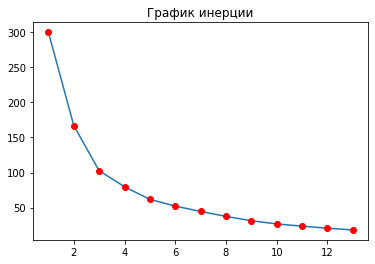

По графику можно лишь сказать, что наиболее подходящими значениями кол-ва кластеров будут значения 3-9.
Рассмотрим их визуально


In [6]:
# подбираем кол-во кластеров
k_inertia = []
ks = range(1, 14)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro')
plt.title("График инерции")
plt.show()

print("По графику можно лишь сказать, что наиболее подходящими значениями кол-ва кластеров будут значения 3-9.")
print("Рассмотрим их визуально")

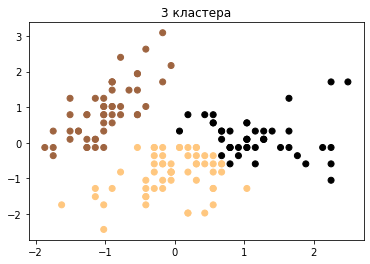

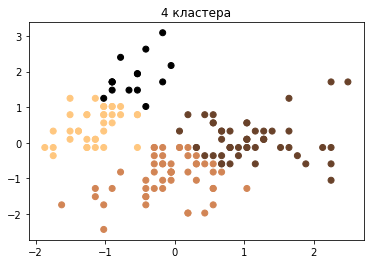

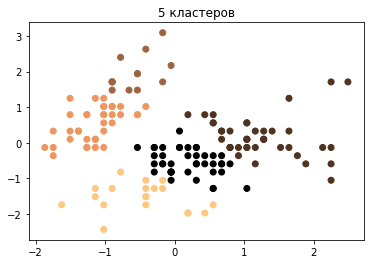

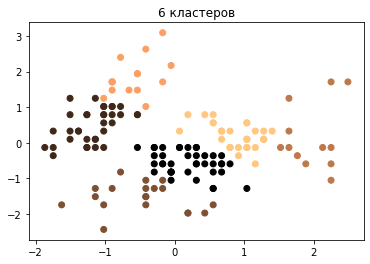

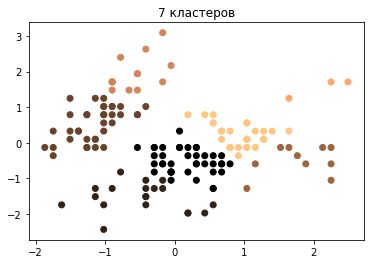

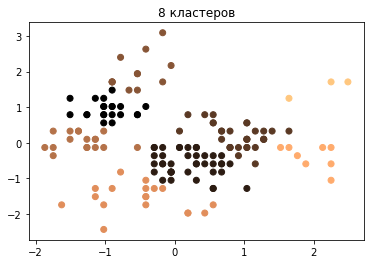

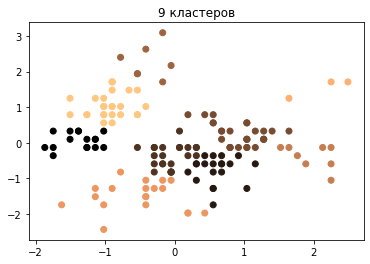

In [7]:
for n_clusters in range(3, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(data_scaled)
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='copper', c=clusters)
    if n_clusters < 5:
        plt.title(f"{n_clusters} кластера")
    else:
        plt.title(f"{n_clusters} кластеров")
    plt.show()

In [8]:
print("Лучше себя показали варианты из 3, 5 и 7 кластеров.")
print("Вариант из 5 кластеров выглядит лучшим среди них: меньше проблем с границами и относительно равномерное распределение по кол-ву элементов в кластере.")

Лучше себя показали варианты из 3, 5 и 7 кластеров.
Вариант из 5 кластеров выглядит лучшим среди них: меньше проблем с границами и относительно равномерное распределение по кол-ву элементов в кластере.
